# Testing HotVis on the highschool graph

In [1]:
import csv
from HotVisFunctions import *
import pandas as pd

In [2]:
# load graph
highschool_graph = pp.io.read_csv_temporal_graph('graphs/Highschool/proximity/edges.csv', is_undirected = False, timestamp_format='%S')
# load metadata
meta_data = pd.read_csv("graphs/Highschool/proximity/nodes.csv")


Every class gets its own color.

In [3]:
print(meta_data["class"].unique())

['2BIO3' 'PC*' '2BIO2' 'PSI*' 'PC' 'MP*1' 'MP' '2BIO1' 'MP*2']


In [4]:
colors = {}
color_map = {'2BIO3': 'yellow', 'PC*': 'green', '2BIO2': 'blue', 'PSI*':'pink', 'PC':'gray', 'MP*1':'black', 'MP':'red', '2BIO1':'purple', 'MP*2':'orange'}
for index, row in meta_data.iterrows():
        colors[f"{row['index']}"] = color_map[row['class']]
style = {}
style['node_color'] = colors
style['node_size'] = 10
style['edge_size'] = 0.1
style['edge_opacity'] = 0


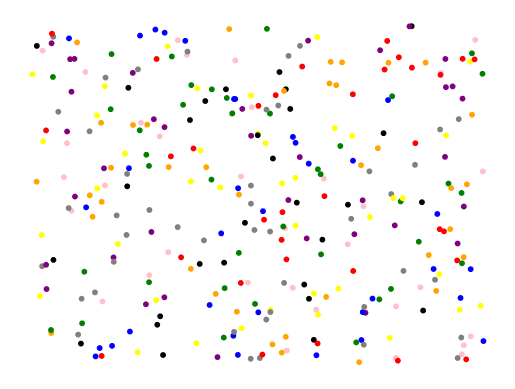

In [5]:
pp.plot(highschool_graph.to_static_graph(), backend='matplotlib' ,**style)

In [6]:
layout_2 =  HotVis(highschool_graph, 2, 50000, 80, alpha=[1, 0.5], force=10)
layout_3 =  HotVis(highschool_graph, 3, 50000, 80, alpha=[1, 0.5, 0.3], force=10)
layout_5 =  HotVis(highschool_graph, 5, 50000, 80, alpha=[1, 0.5, 0.3, 0.25, 0.2], force=10)


100%|██████████| 50000/50000 [01:15<00:00, 659.55it/s]


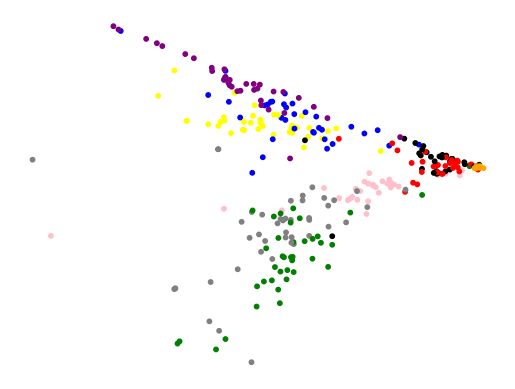

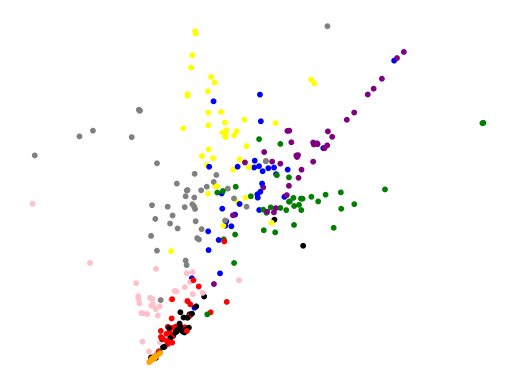

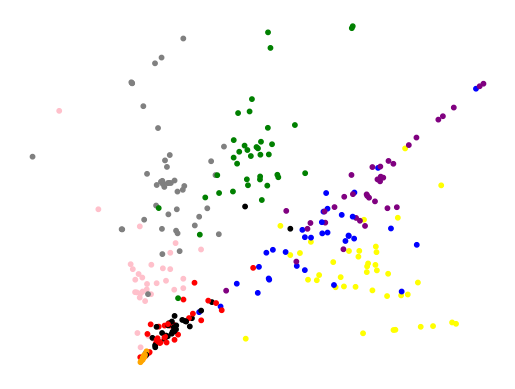

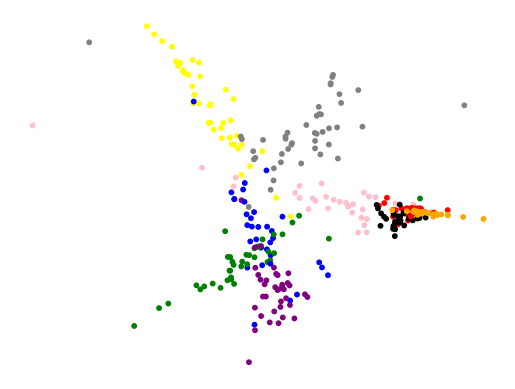

In [7]:
pp.plot(highschool_graph.to_static_graph(), layout=layout_2, backend='matplotlib' ,**style)
pp.plot(highschool_graph.to_static_graph(), layout=layout_3, backend='matplotlib' ,**style)
pp.plot(highschool_graph.to_static_graph(), layout=layout_5, backend='matplotlib' ,**style)
pp.plot(highschool_graph.to_static_graph(), layout="fr", backend='matplotlib' ,**style)

In [8]:
clusters = meta_data.groupby('class')['index'].apply(list).values

clusters = [[str(i) for i in cluster] for cluster in clusters]
# filter nodes, wich doesn't occure in graph
valid_nodes = set(highschool_graph.mapping.node_ids)
clusters = [list(filter(lambda node: node in set(highschool_graph.mapping.node_ids), cluster)) for cluster in clusters]
# filter empty lists
clusters = [lst for lst in clusters if lst]

print(clusters)


[['24', '26', '29', '40', '47', '52', '65', '142', '148', '155', '165', '168', '169', '174', '175', '177', '183', '190', '191', '210', '212', '218', '222', '223', '224', '231', '249', '255', '256', '257', '275', '279', '280', '284', '288', '289'], ['2', '9', '10', '17', '23', '53', '58', '59', '61', '63', '68', '86', '90', '103', '107', '118', '121', '124', '127', '130', '134', '143', '149', '154', '164', '170', '185', '193', '204', '230', '236', '265', '266', '287'], ['0', '14', '21', '25', '27', '37', '39', '43', '44', '46', '50', '60', '66', '72', '73', '76', '77', '91', '98', '101', '105', '109', '111', '129', '132', '135', '147', '158', '180', '194', '200', '209', '217', '219', '241', '242', '261', '264', '268', '277'], ['12', '13', '15', '20', '55', '56', '57', '75', '83', '84', '94', '95', '145', '163', '184', '188', '189', '196', '197', '198', '199', '203', '211', '214', '215', '221', '225', '226', '227', '235', '258', '260', '262'], ['7', '38', '54', '89', '110', '113', '114',

In [9]:
print(cluster_distance_ratio(highschool_graph, clusters, layout_2))
print(cluster_distance_ratio(highschool_graph, clusters, layout_3))
print(cluster_distance_ratio(highschool_graph, clusters, layout_5))

tensor([0.2902, 0.3862, 0.2864, 0.1862, 0.2160, 0.0076, 0.4453, 0.3373, 0.4170])
tensor([0.3279, 0.4590, 0.3575, 0.1976, 0.2077, 0.0101, 0.4595, 0.4106, 0.2811])
tensor([0.3207, 0.4167, 0.3285, 0.1977, 0.2095, 0.0100, 0.3665, 0.3646, 0.3098])


In [10]:
#print(edge_crossing(highschool_graph, layout_2))
#print(edge_crossing(highschool_graph, layout_3))
# print(edge_crossing(highschool_graph, layout_5))

In [11]:
print(causal_path_dispersion(highschool_graph, layout_2, 80))
print(causal_path_dispersion(highschool_graph, layout_3, 80))
print(causal_path_dispersion(highschool_graph, layout_5, 80))

100%|██████████| 1157/1157 [00:02<00:00, 436.59it/s]


tensor(0.9076, dtype=torch.float64)


100%|██████████| 1157/1157 [00:02<00:00, 414.82it/s]


tensor(0.9519, dtype=torch.float64)


100%|██████████| 1157/1157 [00:02<00:00, 411.83it/s]


tensor(0.9177, dtype=torch.float64)


In [ ]:
print(closeness_eccentricity(highschool_graph, layout_2, 80, 0.1))
print(closeness_eccentricity(highschool_graph, layout_3, 80, 0.1))
print(closeness_eccentricity(highschool_graph, layout_5, 80, 0.1))

  0%|          | 0/1157 [00:00<?, ?it/s]

100%|██████████| 1157/1157 [00:02<00:00, 398.11it/s]
/workspaces/pathpyG/src/pathpyG/visualisations/Project_JS/HotVisFunctions.py:234: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  path_indices = torch.tensor(paths.mapping.to_idxs(path))


tensor(0.7864, dtype=torch.float64)


100%|██████████| 1157/1157 [00:02<00:00, 414.86it/s]


tensor(0.7832, dtype=torch.float64)


100%|██████████| 1157/1157 [00:02<00:00, 424.24it/s]


tensor(0.7978, dtype=torch.float64)


: 